In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import HTC
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
norm=pickle.load(open('norm_100run_6000time_0-0to0-3_compute_all_2.pickle','rb'))
n_norm=pickle.load(open('not_norm_100run_6000time_0-0to0-3_compute_all_2.pickle','rb'))
add_w=pickle.load(open('weight_100run_6000time_0-0to0-3tc_20.bin','rb'))

In [3]:
print(len(add_w),len(add_w[0]),len(add_w[0][0]),add_w[0][0].keys(),sep='\n')

1
50
7
dict_keys(['tc', 'activity', 'sigma_activity', 's_distrib', 's1', 's2', 'fc'])


In [4]:
# Take the mean of the different attempts with the same connectome (as suggested by Giacomo)
n_attempts=len(add_w)
a_f=np.zeros((n_attempts,len(add_w[0][0]['activity']) ))
sigma_a_f=np.zeros((n_attempts,len(add_w[0][0]['sigma_activity']) ))
s1_f=np.zeros((n_attempts,len(add_w[0][0]['s1']) ))
s2_f=np.zeros((n_attempts,len(add_w[0][0]['s2']) ))

for j in range(len(add_w)):
    # The temporary containers for the simulated data
    a=np.zeros(((len(add_w[j])),len(add_w[j][0]['activity'])))
    sigma_a=np.zeros(((len(add_w[j])),len(add_w[j][0]['sigma_activity'])))
    s1=np.zeros((len(add_w[j]),len(add_w[j][0]['s1'])))
    s2=np.zeros((len(add_w[j]),len(add_w[j][0]['s2'])))

    for i in range(len(add_w[j])):
        a[i]=add_w[j][i]['activity']
        sigma_a[i]=add_w[j][i]['sigma_activity']
        s1[i]=add_w[j][i]['s1']
        s2[i]=add_w[j][i]['s2']
        
    a_f[j]=np.mean(a, axis=0)
    sigma_a_f[j]=np.mean(sigma_a, axis=0)
    s1_f[j]=np.mean(s1, axis=0)
    s2_f[j]=np.mean(s2, axis=0)

In [5]:
add_we={'activity':a_f[0], 'sigma_activity':sigma_a_f[0],'s1':s1_f[0],'s2':s2_f[0]}
tc=norm['tc']

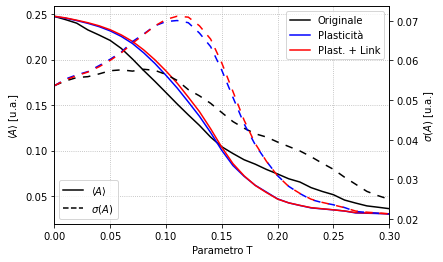

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(tc,n_norm['activity'], label='Originale', color='black')
ax1.plot(tc,norm['activity'], label='Plasticità', color='blue')
ax1.plot(tc,add_we['activity'],label='Plast. + Link', color='red')

ax2 = ax1.twinx()

ax2.plot(tc,n_norm['sigma_activity'], label='Originale', color='black', linestyle=(0, (5, 5)))
#ax2.scatter(tc,n_norm['sigma_activity'], label='Orig.', color='black', s=8)

ax2.plot(tc,norm['sigma_activity'], label='Plasticità', color='blue', linestyle=(0, (5, 5)))
#ax2.scatter(tc,norm['sigma_activity'], label='Plast.', color='blue', s=8)

ax2.plot(tc,add_we['sigma_activity'],label='Plast. + Link', color='red', linestyle=(0, (5, 5)))
#ax2.scatter(tc,add_we['sigma_activity'],label='Plast. + Link', color='red',s=8 )


ax1.grid(True, linestyle='dotted')
ax1.legend(loc=0)
#ax2.legend(loc=0)

ax1.set_xlabel('Parametro T')
ax1.set_ylabel(r'$\langle A\rangle$ [u.a.]')
ax2.set_ylabel(r'$\sigma(A)$ [u.a.]')


legend_elements = [Line2D([0], [0], color='black', label=r'$\langle A\rangle$'),
                   Line2D([0], [0], ls='dashed', color='black', label=r'$\sigma(A)$')]

# Create the figure
ax2.legend(handles=legend_elements, loc='lower left')
plt.xlim(0,0.3)

plt.savefig('../Figure/Risultati/a_sigma_a.pdf', bbox_inches='tight')
plt.show()

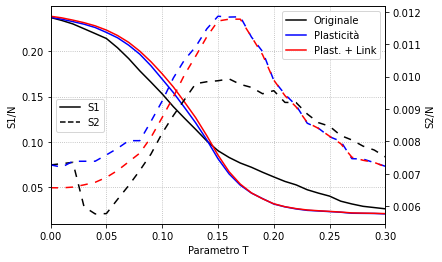

In [7]:
fig, ax1 = plt.subplots()

ax1.plot(tc,n_norm['s1']/66.0, label='Originale', color='black')
ax1.plot(tc,norm['s1']/66.0, label='Plasticità', color='blue')
ax1.plot(tc,add_we['s1']/66.0,label='Plast. + Link', color='red')

ax2 = ax1.twinx()

ax2.plot(tc,n_norm['s2']/66.0, label='Originale', color='black', linestyle=(0, (5, 5)))
#ax2.scatter(tc,n_norm['sigma_activity'], label='Orig.', color='black', s=8)

ax2.plot(tc,norm['s2']/66.0, label='Plasticità', color='blue', linestyle=(0, (5, 5)))
#ax2.scatter(tc,norm['sigma_activity'], label='Plast.', color='blue', s=8)

ax2.plot(tc,add_we['s2']/66.0,label='Plast. + Link', color='red', linestyle=(0, (5, 5)))
#ax2.scatter(tc,add_we['sigma_activity'],label='Plast. + Link', color='red',s=8 )


ax1.grid(True, linestyle='dotted')
ax1.legend(loc=0)
#ax2.legend(loc=0)

ax1.set_xlabel('Parametro T')
ax1.set_ylabel('S1/N')
ax2.set_ylabel('S2/N')


legend_elements = [Line2D([0], [0], color='black', label='S1'),
                   Line2D([0], [0], ls='dashed', color='black', label='S2')]

# Create the figure
ax2.legend(handles=legend_elements, loc='center left')
plt.xlim(0,0.3)

plt.savefig('../Figure/Risultati/s1_s2.pdf', bbox_inches='tight')
plt.show()

In [8]:
rho_nn,chi_nn=HTC.rho_chi_added_weights([n_norm])
rho_ad,chi_ad=HTC.rho_chi_added_weights(add_w[0])
rho_n,chi_n=HTC.rho_chi_added_weights([norm])

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


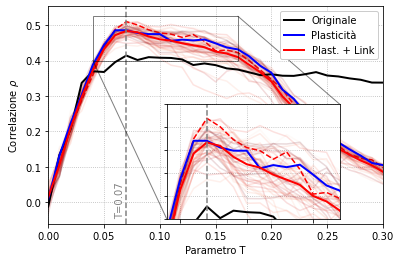

In [9]:

fig,ax=plt.subplots()


for i in range(len(rho_ad)):
    ax.plot(tc, rho_ad[i], alpha=0.15)

colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
    
    
ax.plot(tc, rho_nn[0], color='black', lw=2, label='Originale')
ax.plot(tc, rho_n[0], color='blue', lw=2, label='Plasticità')
ax.plot(tc, np.mean(rho_ad, axis=0), color='red', lw=2, label='Plast. + Link')
ax.grid(True, linestyle='dotted')
ax.legend(loc='upper right', framealpha=1)

ax.set_xlabel('Parametro T')
ax.set_ylabel(r'Correlazione $\rho$')

left, bottom, width, height = [0.4, 0.14, 0.4, 0.40]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(len(rho_ad)):
    ax2.plot(tc, rho_ad[i], alpha=0.15)

for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
ax2.plot(tc, rho_n[0], color='blue', lw=2, label='Plasticità')
ax2.plot(tc, np.mean(rho_ad, axis=0), color='red', lw=2, label='Plast. + Link')
ax2.plot(tc, rho_nn[0], color='black', lw=2, label='Originale')


ax2.set_ylim(0.4,0.525)
ax2.set_xlim(0.04,0.17)
ax.indicate_inset_zoom(ax2, edgecolor="black")
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True, ls='dotted')
ax2.axvline(0.07, ls='dashed', c='grey')
ax.axvline(0.07, ls='dashed', c='grey')
ax.text(0.06,-0.04,'T=0.07', rotation=90, c='grey')

ax2.lines[30].set(alpha=1, ls='dashed', color='r')
ax.lines[30].set(alpha=1, ls='dashed', color='r')

ax.set_xlim(0,0.3)

plt.savefig('../Figure/Risultati/rho.pdf',bbox_inches='tight')
plt.show()

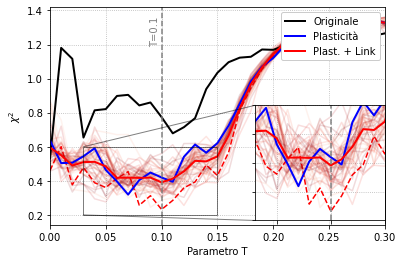

In [12]:

fig,ax=plt.subplots()


for i in range(len(rho_ad)):
    ax.plot(tc, chi_ad[i], alpha=0.15)

colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.2, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
    
    
ax.plot(tc, chi_nn[0], color='black', lw=2, label='Originale')
ax.plot(tc, chi_n[0], color='blue', lw=2, label='Plasticità')
ax.plot(tc, np.mean(chi_ad, axis=0), color='red', lw=2, label='Plast. + Link')
ax.grid(True, linestyle='dotted')
ax.legend(loc='upper right', framealpha=1)

ax.set_xlabel('Parametro T')
ax.set_ylabel(r'$\chi^2$')

left, bottom, width, height = [0.6, 0.14, 0.3, 0.40]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(len(rho_ad)):
    ax2.plot(tc, chi_ad[i], alpha=0.15)

for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
ax2.plot(tc, chi_n[0], color='blue', lw=2, label='Plasticità')
ax2.plot(tc, np.mean(chi_ad, axis=0), color='red', lw=2, label='Plast. + Link')
ax2.plot(tc, chi_nn[0], color='black', lw=2, label='Originale')

ax2.lines[24].set(alpha=1, ls='dashed', color='r')
ax.lines[24].set(alpha=1, ls='dashed', color='r')


ax2.set_ylim(0.2,0.6)
ax2.set_xlim(0.03,0.15)
ax.indicate_inset_zoom(ax2, edgecolor="black")
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True, ls='dotted')
ax2.axvline(0.1, ls='dashed', c='grey')
ax.axvline(0.1, ls='dashed', c='grey')
ax.text(0.09,1.2,'T=0.1', rotation=90, c='grey')


ax.set_xlim(0,0.3)

plt.savefig('../Figure/Risultati/chi.pdf',bbox_inches='tight')
plt.show()

In [11]:
print('Rho:',np.where(rho_ad==np.max(rho_ad)),'\nChi:',np.where(chi_ad==np.min(chi_ad)))

Rho: (array([30]), array([7])) 
Chi: (array([24]), array([10]))
